<a href="https://colab.research.google.com/github/ph7klw76/SMEB2201_Lecture_on_QM_in_Materials_Science/blob/main/quantum_wire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the world of organic, there are numerous organic materials that behave like quantum wires. They are quantum well of different lengths. Example: Benzene as a quantum dot. Naphthalene as quantum wire.
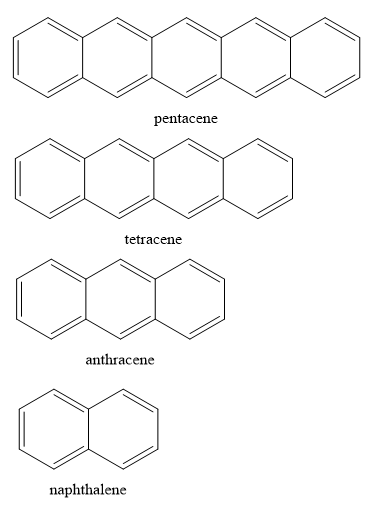

The gap between HOMO and LUMO can be expressed as 
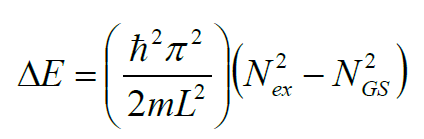

As you can see from the above equation, the gap is inversely proportional to length squared of the well. You can use the equation to calculate the gap. Note this doesn't take into account the effect of electron-electron and exchange interactions. This is however an approximation to demostrate that quantum effects are all around us. 

The codes below are trained network that can perform very fast quantum calculation. You can see the how conjugation affects the energy gap. The energy gap is related to optical transition which gives colour to the carrot. You need to install packages below to run.

In [ ]:
!pip install schnetpack
!pip install torchani

     |████████████████████████████████| 10.8MB 6.7MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 


You need to download the trained model from https://drive.google.com/drive/folders/1bHTky03dk5awI8QB1DdxkBE-qv3QQSlr?usp=sharing  and put into your google drive and give the permission for Google Colab to access the data. Trained machine learning model can speed up the calculation a million times.

In [ ]:
import torch
import schnetpack as spk
from ase import Atoms
from schnetpack.datasets import QM9
from google.colab import drive
from ase.optimize import BFGS
import torchani
drive.mount('/content/drive',force_remount=True)


if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

model = torch.load('/content/drive/My Drive/trained_schnet_models/qm9_gap/best_model', map_location=(device))

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribu

In [ ]:
def minimization(molecule):
  calculator = torchani.models.ANI2x().ase()
  molecule.set_calculator(calculator)
  print("Begin minimizing...")
  opt = BFGS(molecule)
  opt.run(fmax=0.00005)
  print()
  print(molecule.get_positions())
  return molecule

In [ ]:
d=1.08
benzene = Atoms(numbers=[6,6,6,6,6,6,1,1,1,1,1,1],positions=[(0.06094800,-1.39749200,0.00000000),(1.24076900,-0.64590500,-0.00000800),(1.17979500,0.75152600,0.00000600),(-0.06101700,1.39749300,-0.00000100),(-1.24074000,0.64596400,-0.00000500),(-1.17975600,-0.75158500,0.00000700),(0.10846900,-2.48458400,-0.00000700),(2.20590000,-1.14845500,0.00000100),(2.09748300,1.33623100,0.00001100),(-0.10835800,2.48459400,0.00000900),(-2.20595700,1.14834900,-0.00002100),(-2.09753600,-1.33614300,0.00001700)])
N2 = Atoms(numbers=[7, 7], positions=[(0, 0, 0), (0, 0, d)]) # numbers are atomic numbers, and positions are the x,y,z coordinates 
CO2=Atoms(numbers=[6,8,8], positions=[(0, 0, 0), (1.190, 0, 0),(-1.190, 0, 0)])
H20 = Atoms(numbers=[8,1,1], positions=[(0, 0, 0), (0.757, 0.586, 0.0),(-0.757, 0.586, 0.0)]) # numbers are atomic numbers, and positions are the x,y,z coordinates 
Naphthalene=Atoms(numbers=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1],positions=[(2.44739, -0.67026, 0.02788), (2.42794, 0.7214, 0.02286), (1.20939, 1.40214, 0.0067), (-0.00596, 0.69845, -0.00465), (0.0138, -0.71553, 0.00046), (1.24834, -1.38488, 0.01676), (-1.2405, 1.36781, -0.02095), (-2.43955, 0.65319, -0.03208), (-2.4201, -0.73848, -0.02705), (-1.20155, -1.41922, -0.01089), (3.39549, -1.20135, 0.04045), (3.36083, 1.27886, 0.03151), (1.21442, 2.48969, 0.00301), (1.28375, -2.47186, 0.0209), (-1.27591, 2.45479, -0.0251), (-3.38765, 1.18428, -0.04466), (-3.353, -1.29593, -0.0357), (-1.20658, -2.50677, -0.00719)])
anthracene=Atoms(numbers=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],positions=[(-3.66062, 0.70368, 0.06236), (-3.66205, -0.68746, 0.06365), (-2.45433, -1.3852, -0.006), (-1.22995, -0.69883, -0.04962), (-1.22903, 0.71337, -0.05021), (-2.4529, 1.3993, -0.00665), (-0.0048, -1.38759, -0.0682), (1.2209, -0.70067, -0.04142), (1.22163, 0.7108, -0.04215), (-0.00386, 1.39911, -0.06864), (2.44452, -1.38775, 0.01233), (3.65162, -0.69145, 0.08658), (3.65237, 0.70002, 0.08575), (2.44563, 1.39733, 0.01038), (-4.59947, 1.2487, 0.12412), (-4.60001, -1.23228, 0.12534), (-2.47526, -2.47267, 0.00303), (-2.47391, 2.48734, 0.001), (-0.00429, -2.47563, -0.07331), (-0.00258, 2.48786, -0.0753), (2.46453, -2.47529, 0.01716), (4.58987, -1.23634, 0.15369), (4.59048, 1.2443, 0.15193), (2.46647, 2.48464, 0.01387)])
tetracene=Atoms(numbers=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],positions=[(-3.45442, 0.3268, -0.11353), (-3.24482, -1.02738, -0.35453), (-1.94775, -1.54276, -0.35291), (-0.84338, -0.70946, -0.10901), (-1.05594, 0.6638, 0.13546), (-2.36728, 1.16767, 0.12952), (0.46792, -1.2132, -0.10165), (1.57197, -0.38, 0.14654), (1.35971, 0.99117, 0.39078), (0.04849, 1.49647, 0.38087), (2.88304, -0.88565, 0.15831), (3.98687, -0.05439, 0.41106), (3.77429, 1.31882, 0.6558), (2.46359, 1.82396, 0.64112), (5.29738, -0.56017, 0.42702), (6.38353, 0.27838, 0.68222), (6.1739, 1.63248, 0.92363), (4.8778, 2.15013, 0.91017), (-4.46357, 0.73028, -0.11394), (-4.08987, -1.68413, -0.5436), (-1.80425, -2.60405, -0.54307), (-2.55144, 2.2233, 0.31612), (0.63149, -2.27261, -0.29031), (-0.1159, 2.55576, 0.56949), (3.04743, -1.94494, -0.03038), (2.3, 2.88334, 0.82994), (5.4815, -1.61589, 0.24092), (7.39187, -0.12699, 0.69256), (7.01811, 2.28727, 1.12301), (4.73421, 3.2112, 1.10144)])
pentacene=Atoms(numbers=[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],positions=[(-3.65567, 0.67758, -0.22674), (-3.46817, -0.17974, -1.30641), (-2.18523, -0.62615, -1.62699), (-1.07299, -0.22023, -0.87095), (-1.26314, 0.64919, 0.22398), (-2.56053, 1.08979, 0.53401), (0.22449, -0.66057, -1.18061), (1.33666, -0.25415, -0.42387), (1.14685, 0.61368, 0.66905), (-0.15069, 1.05484, 0.97972), (2.63452, -0.69464, -0.73356), (3.74732, -0.28896, 0.02243), (3.55751, 0.57887, 1.11535), (2.25965, 1.01938, 1.42502), (5.04485, -0.73018, -0.2882), (6.15729, -0.32464, 0.46762), (5.96713, 0.54479, 1.56255), (4.66967, 0.98523, 1.87214), (7.45465, -0.76535, 0.15768), (8.54978, -0.35327, 0.91853), (8.36227, 0.50404, 1.9982), (7.07935, 0.95059, 2.31869), (-4.65379, 1.02647, 0.02474), (-4.31948, -0.50203, -1.9002), (-2.05899, -1.29596, -2.47465), (-2.72741, 1.76018, 1.37415), (0.37076, -1.33126, -2.02533), (-0.2978, 1.72553, 1.82429), (2.78123, -1.3654, -1.5783), (2.11294, 1.69014, 2.26975), (5.19195, -1.40088, -1.13277), (4.52339, 1.65591, 2.71686), (7.62153, -1.43575, -0.68245), (9.54787, -0.70227, 0.66713), (9.21357, 0.82623, 2.59207), (6.95311, 1.62039, 3.16635)])

Defination of molecules, you need to minimize the structure before doing any calculation.

In [ ]:
molecule=minimization(anthracene)

Begin minimizing...
      Step     Time          Energy         fmax
BFGS:    0 05:05:53   -14677.038643        1.7472
BFGS:    1 05:05:53   -14677.162355        0.9694
BFGS:    2 05:05:53   -14677.203581        0.2324
BFGS:    3 05:05:53   -14677.206871        0.1214
BFGS:    4 05:05:53   -14677.209517        0.1056
BFGS:    5 05:05:53   -14677.211086        0.0575
BFGS:    6 05:05:53   -14677.211410        0.0325
BFGS:    7 05:05:53   -14677.211660        0.0326
BFGS:    8 05:05:53   -14677.211952        0.0451
BFGS:    9 05:05:53   -14677.212422        0.0620
BFGS:   10 05:05:53   -14677.213081        0.0682
BFGS:   11 05:05:53   -14677.213851        0.0556
BFGS:   12 05:05:54   -14677.214580        0.0549
BFGS:   13 05:05:54   -14677.215306        0.0606
BFGS:   14 05:05:54   -14677.216274        0.0727
BFGS:   15 05:05:54   -14677.217362        0.0697
BFGS:   16 05:05:54   -14677.218220        0.0728
BFGS:   17 05:05:54   -14677.218835        0.0636
BFGS:   18 05:05:54   -14677.21

In [ ]:
calculator = spk.interfaces.SpkCalculator(model=model, device=device, energy=QM9.gap, energy_units='eV')

molecule.calc=calculator

print("HOMO-LUMO gap=",molecule.get_total_energy()[0], "eV")

HOMO-LUMO gap= 3.9146917 eV


/usr/local/lib/python3.6/dist-packages/ase/atoms.py:972: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  np.VisibleDeprecationWarning)


How much difference in terms of HOMO-LUMO gap and the gap calcuated using simple formula? Do you see the trend with increasing conjugation?


Now generally, increasing the conjugation decreases the optical bandgap. This rule can be somewhat violated as shown in recent paper. https://pubs.rsc.org/en/content/articlelanding/2018/ra/c8ra00674a#!divAbstract